# Saddle Connection Demo

Initial version by Pat Hooper <whooper@ccny.cuny.edu> on Dec. 16, 2017.

In [1]:
from flatsurf import *

In [2]:
s = translation_surfaces.veech_double_n_gon(5)

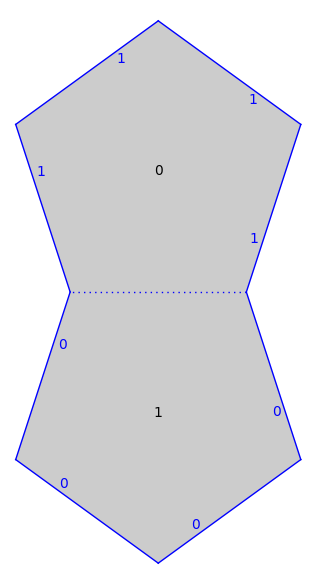

In [3]:
s.plot()

We get a list of all saddle connections of length less than $\sqrt{100}$.

In [4]:
sc_list = s.saddle_connections(100)
len(sc_list)

520

The following removes dublicate saddle connections which appear with opposite orientations.

In [5]:
sc_set = set()
for sc in sc_list:
    if sc.invert() not in sc_set:
        sc_set.add(sc)
sc_list2 = [sc for sc in sc_set]
len(sc_list2)

260

We pick two saddle connections:

In [6]:
sc1 = sc_list2[99]
sc2 = sc_list2[55]

We can find their holonomies and other information about them using methods.

In [7]:
print("Holonomy of sc1 is"+str(sc1.holonomy())+" = "+str(sc1.holonomy().n()))
print("Holonomy of sc2 is"+str(sc2.holonomy())+" = "+str(sc2.holonomy().n()))

Holonomy of sc1 is(-a^2 + 5/2, -3/2*a^3 + 2*a) = (-1.11803398874989, -6.51863833835319)
Holonomy of sc2 is(-a^2 + 5/2, 3/2*a^3 - 2*a) = (-1.11803398874989, 6.51863833835319)


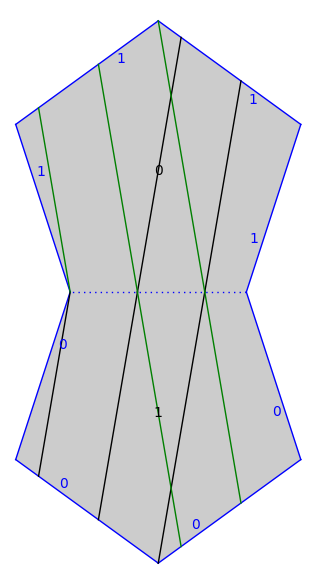

In [8]:
s.plot() + sc1.plot() + sc2.plot(color="green")

We can test that they intersect. By default the singularity does not count.

In [9]:
sc1.intersects(sc2)

True

We can get an iterator over the set of intersection points:

In [10]:
for p in sc1.intersections(sc2):
    print p

Surface point with 2 coordinate representations
Surface point located at (-3/2*a^2 + 6, 3/10*a^3 - 1/2*a) in polygon 0
Surface point with 2 coordinate representations
Surface point located at (-3/2*a^2 + 5, -3/10*a^3 + 1/2*a) in polygon 1


It is a good idea to store the intersections in a list if you want to reuse them:

In [11]:
intersections = [p for p in sc1.intersections(sc2)]

We can plot the intersection points:

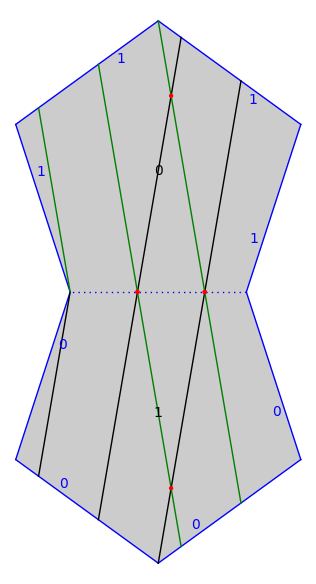

In [12]:
plot = s.plot() + sc1.plot() + sc2.plot(color="green")
for p in intersections:
    plot += p.plot(color="red", zorder=3)
plot

We can plot all the saddle connections:

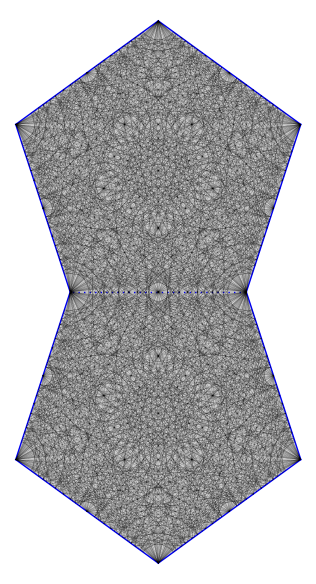

In [13]:
plot=s.plot(edge_labels=False, polygon_labels=False)
for sc in sc_list:
    plot += sc.plot(thickness=0.05)
plot

We will build a subset of the saddle connection graph where vertices are saddle connections and two vertices are joined by an edge if and only if the saddle connections do not intersect (on their interiors).

In [14]:
# Build intersection graph
d={}
for i in xrange(len(sc_list2)):
    for j in xrange(i+1,len(sc_list2)):
        if not sc_list2[i].intersects(sc_list2[j]):
            if i not in d:
                d[i]=[j]
            else:
                d[i].append(j)
            if j not in d:
                d[j]=[i]
            else:
                d[j].append(i)

In [15]:
g=Graph(d)

We place the vertex of a saddle connection with holonomy $z \in {\mathbb C}$ at the point $z^2$.

In [16]:
pos={}
for i in xrange(len(sc_list2)):
    sc = sc_list2[i]
    val = sc.holonomy().n()
    z = val[0]+I*val[1]
    w = z**2/z.abs()
    pos[i]=(w.real(),w.imag())

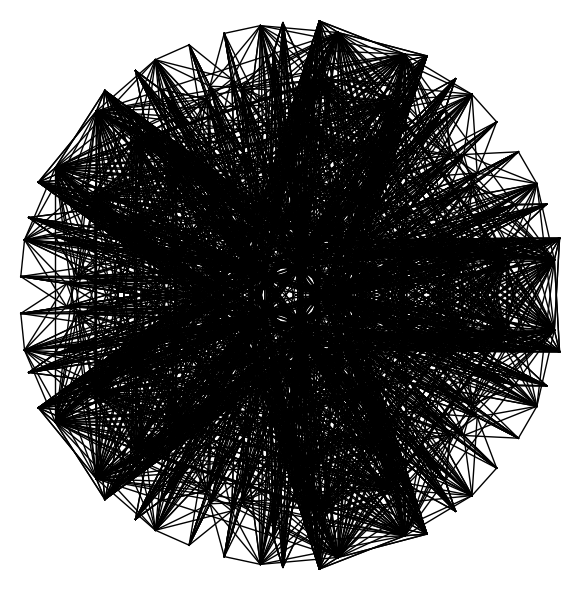

In [17]:
g.plot(pos=pos,vertex_labels=False,vertex_size=0)